- Konfigurasi API Kaggle dengan vscode

In [58]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

- mendownload file dari Kaggle

In [59]:
dataset_name = "ritwikb3/heart-disease-cleveland"
api.dataset_download_files(dataset_name, path=".", unzip=True)

- Menentukan library yang akan digunakan

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

- Membaca Dataset yang telah didownload, yaitu file heart.csv

In [61]:
heart_dataset = pd.read_csv('Heart_disease_cleveland_new.csv')

In [62]:
heart_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


- Cek missing value didalam data heart_dataset

In [63]:
nan_data=heart_dataset[heart_dataset.isna().any(axis=1)]
nan_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


- Visualisasi Data

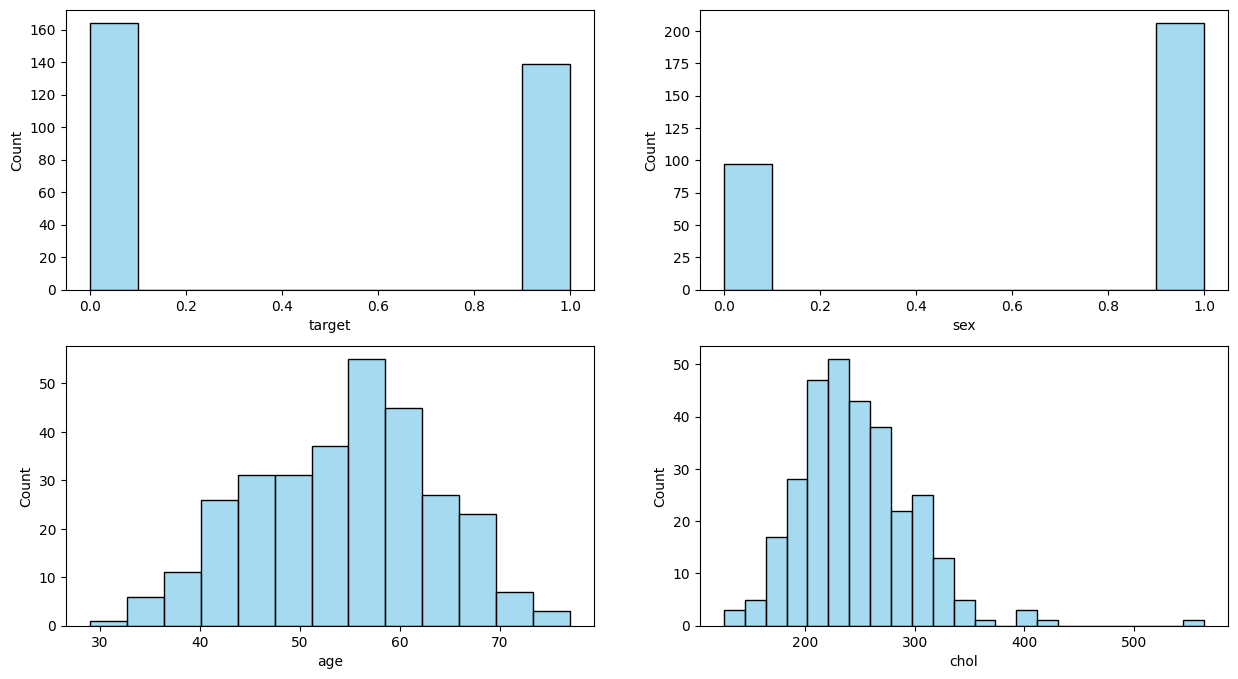

In [64]:
fig,axes = plt.subplots(2,2,figsize =(15,8))
sns.histplot(data =heart_dataset,x='target',ax=axes[0,0], color='skyblue')
sns.histplot(data =heart_dataset,x='sex',ax=axes[0,1], color='skyblue')
sns.histplot(data =heart_dataset,x='age',ax=axes[1,0], color='skyblue')
sns.histplot(data =heart_dataset,x='chol',ax=axes[1,1], color='skyblue')

plt.show()

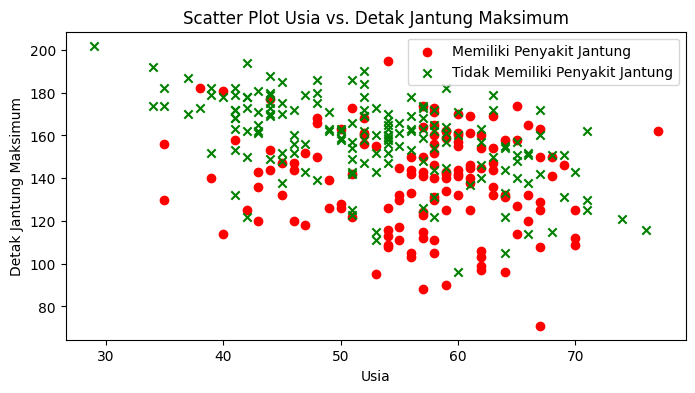

In [65]:

heart_disease = heart_dataset[heart_dataset["target"] == 1]
no_heart_disease = heart_dataset[heart_dataset["target"] == 0]
plt.figure(figsize=(8, 4))  
plt.scatter(x=heart_disease["age"], y=heart_disease["thalach"], c="red", marker="o", label="Memiliki Penyakit Jantung")
plt.scatter(x=no_heart_disease["age"], y=no_heart_disease["thalach"], c="green", marker="x", label="Tidak Memiliki Penyakit Jantung")
plt.xlabel("Usia")
plt.ylabel("Detak Jantung Maksimum")
plt.title("Scatter Plot Usia vs. Detak Jantung Maksimum")
plt.legend()
plt.show()


- Preprocessing

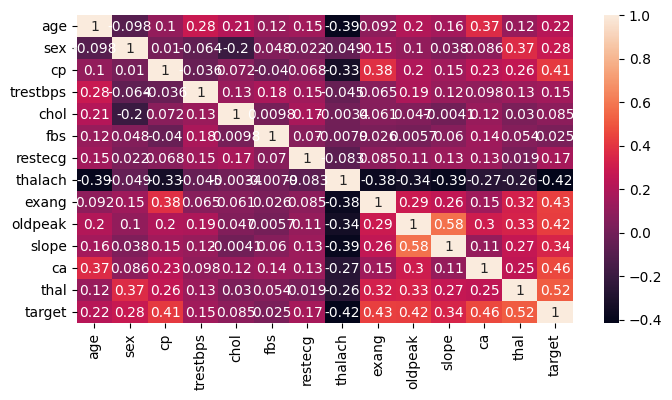

In [66]:
numerical_data = heart_dataset.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [67]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [68]:
data = heart_dataset
heart_by_sex = data.groupby('sex')['target'].sum()
print(heart_by_sex)

sex
0     25
1    114
Name: target, dtype: int64


In [69]:
heart_dataset.shape

(303, 14)

- Memisahkan data dan label

In [70]:
X = heart_dataset.drop (columns='target',axis=1)
Y = heart_dataset['target']

In [71]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   0       145   233    1        2      150      0      2.3   
1     67    1   3       160   286    0        2      108      1      1.5   
2     67    1   3       120   229    0        2      129      1      2.6   
3     37    1   2       130   250    0        0      187      0      3.5   
4     41    0   1       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   0       110   264    0        0      132      0      1.2   
299   68    1   3       144   193    1        0      141      0      3.4   
300   57    1   3       130   131    0        0      115      1      1.2   
301   57    0   1       130   236    0        2      174      0      0.0   
302   38    1   2       138   175    0        0      173      0      0.0   

     slope  ca  thal  
0        2   0     2  
1        1   3     1  
2        1   2    

In [72]:
print (Y)

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: target, Length: 303, dtype: int64


- Menstandarisasikan data

In [73]:
scaler = StandardScaler ()

In [74]:
scaler.fit(X)

StandardScaler()

In [75]:
standarized_data = scaler.transform(X)

In [76]:
print(standarized_data)

[[ 0.94872647  0.68620244 -2.25177456 ...  2.27457861 -0.71113139
   0.17622495]
 [ 1.39200191  0.68620244  0.87798549 ...  0.64911323  2.5048807
  -0.87075858]
 [ 1.39200191  0.68620244  0.87798549 ...  0.64911323  1.43287667
   1.22320848]
 ...
 [ 0.28381332  0.68620244  0.87798549 ...  0.64911323  0.36087264
   1.22320848]
 [ 0.28381332 -1.4572959  -1.20852121 ...  0.64911323  0.36087264
  -0.87075858]
 [-1.82174501  0.68620244 -0.16526786 ... -0.97635214 -0.71113139
  -0.87075858]]


In [77]:
X = standarized_data
Y = heart_dataset['target']

print(X)
print(Y)

[[ 0.94872647  0.68620244 -2.25177456 ...  2.27457861 -0.71113139
   0.17622495]
 [ 1.39200191  0.68620244  0.87798549 ...  0.64911323  2.5048807
  -0.87075858]
 [ 1.39200191  0.68620244  0.87798549 ...  0.64911323  1.43287667
   1.22320848]
 ...
 [ 0.28381332  0.68620244  0.87798549 ...  0.64911323  0.36087264
   1.22320848]
 [ 0.28381332 -1.4572959  -1.20852121 ...  0.64911323  0.36087264
  -0.87075858]
 [-1.82174501  0.68620244 -0.16526786 ... -0.97635214 -0.71113139
  -0.87075858]]
0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: target, Length: 303, dtype: int64


- Memisahkan data training dan testing

In [78]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y,random_state=2)

In [79]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


In [80]:
print(X)

[[ 0.94872647  0.68620244 -2.25177456 ...  2.27457861 -0.71113139
   0.17622495]
 [ 1.39200191  0.68620244  0.87798549 ...  0.64911323  2.5048807
  -0.87075858]
 [ 1.39200191  0.68620244  0.87798549 ...  0.64911323  1.43287667
   1.22320848]
 ...
 [ 0.28381332  0.68620244  0.87798549 ...  0.64911323  0.36087264
   1.22320848]
 [ 0.28381332 -1.4572959  -1.20852121 ...  0.64911323  0.36087264
  -0.87075858]
 [-1.82174501  0.68620244 -0.16526786 ... -0.97635214 -0.71113139
  -0.87075858]]


In [81]:
print(Y)

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: target, Length: 303, dtype: int64


- Membuat data latih menggunakan Algoritma SVM

In [82]:
classifier = svm.SVC(kernel='linear')




In [83]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

- Membuat model evaluasi

In [84]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [85]:
print('akurasi data training adalah =',training_data_accuracy)

akurasi data training adalah = 0.8553719008264463


In [86]:
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [87]:
print('akurasi data testing adalah =',testing_data_accuracy)

akurasi data testing adalah = 0.8032786885245902


In [88]:
confusion_matrix_train = confusion_matrix(Y_train, X_train_prediction)
confusion_matrix_test = confusion_matrix(Y_test, X_test_prediction)

In [89]:
print("Matriks Konfusi pada data pelatihan:")
print(confusion_matrix_train)

print("Matriks Konfusi pada data uji:")
print(confusion_matrix_test)

Matriks Konfusi pada data pelatihan:
[[117  14]
 [ 21  90]]
Matriks Konfusi pada data uji:
[[27  6]
 [ 6 22]]


In [90]:
X_test_prediction = classifier.predict(X_test)
classification_rep = classification_report(Y_test, X_test_prediction)
print("Laporan Klasifikasi:")
print(classification_rep)

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        33
           1       0.79      0.79      0.79        28

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [91]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


- Membuat model prediksi

In [92]:
input_data =(67,1,3,160,286,0,2,108,1,1.5,1,3,1)
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshape)

print(std_data)
prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('pasien tidak terkena jantung')
else :
    print('pasien terkena jantung')

[[ 1.39200191  0.68620244  0.87798549  1.61121989  0.76041519 -0.41763453
   1.01668424 -1.82190531  1.43548113  0.39718162  0.64911323  2.5048807
  -0.87075858]]
[1]
pasien terkena jantung


c:\Users\jadoel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [93]:
input_data =(61,0,3,130,330,0,2,169,0,0,0,0,1)
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshape)

print(std_data)
prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('pasien tidak terkena jantung')
else :
    print('pasien terkena jantung')

[[ 0.72708875 -1.4572959   0.87798549 -0.0961698   1.61162051 -0.41763453
   1.01668424  0.84917233 -0.69663055 -0.89686172 -0.97635214 -0.71113139
  -0.87075858]]
[0]
pasien tidak terkena jantung


c:\Users\jadoel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


- Simpan model untuk proses deploy ke streamlit

In [94]:
import pickle

In [95]:
filename = 'prediksi_jantung123.sav'
pickle.dump(classifier,open(filename,'wb'))